# 패스트캠퍼스 검색광고 데이터 분석

## 분석목표 :
    1. 중점관리 키워드가 뭔지, 저효율 키워드가 뭔지 추출
    2. 중점관리 해야하는 광고그룹은 무엇인지, 저효율 광고그룹은 뭔지 추출
 
 ## 분석과정 :
     1. 데이터 전처리
     2. 데이터 탐색
     3. 시각화
     4. 데이터 분석

# 3. 시각화
시각화를 통한 데이터 탐색 실습
    - 학습목표
        1. 현업의 데이터를 사용하여 데이터 시각화를 실습한다. 
        2. 데이터를 가공, 처리하여 시각화를 진행한다. 
        

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import Series

In [2]:
import matplotlib.pyplot as plt

In [3]:
#matplotlib 한글 폰트 출력코드
#출처 : 데이터 공방 (http:// kiddwannabe.blog.me)

import matplotlib
from matplotlib import font_manager, rc
import platform

try :
    #맥인 경우
    rc('font', family = 'AppleGothic')

except :
    pass
matplotlib.rcParams['axes.unicode_minus'] = False

In [14]:
df = pd.read_excel('/Users/jeonghyeonjeong/Desktop/실습데이터_네이버보고서.xls', skiprows=[0])

## 1) 시리즈 시각화
- 하나의 ['   '] 에 대해 시각화를 하는 것은 시리즈 자료구조를 시각화 하는 것이 된다. 


위는 '노출수' column에 대해서 시리즈 시각화를 진행한 것이다. 
- 명확한 패턴이 보일 수 있도록 데이터 시각화 진행
    1. as-is : index를 기준으로 그래프가 출력되는 것(그래프의 x축이 시리즈의 인덱스)
    2. to-be : 정렬된 value를 기준으로 출력
    
        2-1. 시리즈의 value를 수치 순서대로 오름차순 정렬
        
        2-2. 정렬된 데이터의 형태대로 index 재생성 후 시각화

In [15]:
type(df[ '노출수' ])

pandas.core.series.Series

#### 1. as-is : index를 기준으로 그래프가 출력되는 것(그래프의 x축이 시리즈의 인덱스)

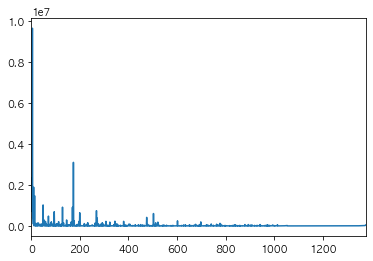

In [17]:
df['노출수'].plot()
plt.show()

#### 2-1. 시리즈의 value를 수치 순서대로 오름차순 정렬 : sort_values()한 후, reset_index()로 재설정

In [20]:
#오름차순 정렬
imp_sort = df['노출수'].sort_values()
imp_sort

#reset_index() : 기준에 따라 정렬 한 데로 index를 다시 reset (여기선 오름차순 정렬 했으니 오름차순), 기존 index를 데이터프레임의 열로 반환
imp_sort = imp_sort.reset_index() 
imp_sort

,index,노출수
0,1057,1001
1,445,1003
2,597,1005
3,983,1006
4,442,1007
...,...,...
1376,13,1470452
1377,9,1887822
1378,0,2319456
1379,173,3095998


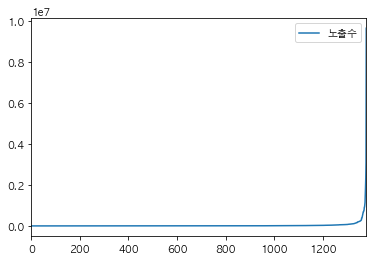

In [25]:
#기존의 index column은 필요 없으니 drop('삭제할 인덱스명', axis = 1(열기준이란 의미), inplace = True(원본을 바꾸겠다는 의미))
imp_sort.drop('index', axis=1, inplace =True)
imp_sort.plot()
plt.show()

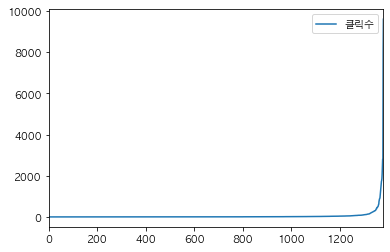

In [28]:
#클릭수 칼럼 시각화 (한줄로 코딩)
((df['클릭수'].sort_values()).reset_index()).drop('index', axis = 1).plot()
plt.show()